## **Preposessing Dataset Training**

---

Dataset tweet berasal dari penelitian: [Emotion dataset from Indonesian public opinion](https://www.sciencedirect.com/science/article/pii/S2352340922006588?via%3Dihub)

Dataset                              : [link Dataset](https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion)

## Installing Package

In [40]:
! pip install sastrawi

## Import Library

In [41]:
import pandas as pd
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

# Load Data Train

In [42]:
anger_data = pd.read_csv("./Dataset/Training/Training_Raw/AngerData.csv", on_bad_lines="skip", delimiter="\t")
anger_data

,tweet,label
0,pagi2 udah di buat emosi :),Anger
1,"kok stabilitas negara, memange 10 thn negara t...",Anger
2,dah lah emosi mulu liat emyu,Anger
3,"aib? bodoh benar! sebelum kata aib itu muncul,...",Anger
4,dih lu yg nyebelin bego,Anger
...,...,...
1125,dan yg emng belom tau banyak lah tentang dunia...,Anger
1126,"aa kesel bgt anying. dia sudah di bandaraa, gi...",Anger
1127,"ini segala keresahan gua udah mau ilang nihh, ...",Anger
1128,"gue pernah datang lebih awal, sebelum waktu ny...",Anger


In [43]:
fear_data = pd.read_csv("./Dataset/Training/Training_Raw/FearData.csv", on_bad_lines="skip", delimiter="\t")
fear_data

,tweet,label
0,trs barusan dia reach out aku trs minta tolong...,Fear
1,sumpah ini receh bgt dan not bts related. cm j...,Fear
2,ragu utk bisa beli barang tu karn harganya bis...,Fear
3,bisa gak sih langsung tanggal 11 aja gausah ad...,Fear
4,iya kaan yg lain suka pada coba pd gpp tp tete...,Fear
...,...,...
906,bgt! sepi dan serem,Fear
907,sepi aneh kayak ada yg perhatiin tapi gk ada s...,Fear
908,joonyoung.. paling merinding sama sedih jadi 1,Fear
909,"mau nonton kukira kau rumah awokaowkwk, tapi t...",Fear


In [44]:
joy_data = pd.read_csv("./Dataset/Training/Training_Raw/JoyData.csv", on_bad_lines="skip", delimiter="\t")
joy_data

,tweet,label
0,dipeluk enak nih,Joy
1,masih dongg wkkwkwtar klo gk semangat gk bisa ...,Joy
2,semangat dan bertambah kuatlah kalian frp_nats...,Joy
3,jangan lupa sarapann semangat buat hari inii a...,Joy
4,aw ikut seneng semangat ya kuliahnya!,Joy
...,...,...
1270,yaaaa rumah sepi. mari kita party wakwakk,Joy
1271,"seru tau prenjon zer kdng sedih kdng baper, se...",Joy
1272,aahh iyaa bgtt hazaa!! kek tbtb bawaannya mell...,Joy
1273,kadrun kroco sih cuman dapet nasbung jk ada or...,Joy


In [45]:
love_data = pd.read_csv("./Dataset/Training/Training_Raw/LoveData.csv", on_bad_lines="skip", delimiter="\t")
love_data

,tweet,label
0,"suka banget kata2, ""kebenaran hanya menurut se...",Love
1,hanse mode anak rumahan gini tuh aku suka bang...,Love
2,"ya kali ngejar ngejar cinta, ngejar tahajjud a...",Love
3,selamat pagi sender! sana avail nih pas hari v...,Love
4,sopaa!! cuz akuu suka banget jurusan tari di s...,Love
...,...,...
755,ngeliat teaser wonpil jadi sedih anjir apaan s...,Love
756,"lae ku sayang jangan sedih ya, bentar lagu kau...",Love
757,"lockey tetep harus support secret number juga,...",Love
758,"ku tetap membelamu meski kau jahat, karna ku c...",Love


In [46]:
neutral_data = pd.read_csv("./Dataset/Training/Training_Raw/NeutralData.csv", on_bad_lines="skip", delimiter="\t")
neutral_data

,tweet,label
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral
1,baru saja mengirim foto,Neutral
2,apa kabar dunia twitter ? masihkah selucu dan ...,Neutral
3,yah gimana sih yang yaudah susul aku dulu kita...,Neutral
4,saja ka dorg suro beli medium 2 set,Neutral
...,...,...
1996,"karena tau rasa kesepian, manusia akan menjadi...",Neutral
1997,yang terbaik adalah percaya dan berlindung han...,Neutral
1998,sahabat adalah mereka yg tahu bahwa ada sedih ...,Neutral
1999,"terkadang, bukan karena dusta, kamu membenci s...",Neutral


In [47]:
sad_data = pd.read_csv("./Dataset/Training/Training_Raw/SadData.csv", on_bad_lines="skip", delimiter="\t")
sad_data

,tweet,label
0,"akibat dari telat bangun, anak ikut bangun dan...",Sad
1,sepi,Sad
2,sedih dah,Sad
3,"sedih emg kalo ditinggal temen ngebucin, sedih...",Sad
4,sedih bener niih club ya,Sad
...,...,...
998,pagi saat seisi semesta sujud pada zat yg acap...,Sad
999,"meski engkau yg pergi, meski engkau yg meningg...",Sad
1000,udah biasa kalah dan tersakiti,Sad
1001,"apakabar ku?. apakah baik-baik saja,, tidak, a...",Sad


Gabungkan semua data menjadi satu dataframe.

In [48]:
train_data = pd.concat([anger_data,fear_data,joy_data,love_data,neutral_data,sad_data])
train_data.reset_index(inplace=True,drop=True)
train_data

,tweet,label
0,pagi2 udah di buat emosi :),Anger
1,"kok stabilitas negara, memange 10 thn negara t...",Anger
2,dah lah emosi mulu liat emyu,Anger
3,"aib? bodoh benar! sebelum kata aib itu muncul,...",Anger
4,dih lu yg nyebelin bego,Anger
...,...,...
7075,pagi saat seisi semesta sujud pada zat yg acap...,Sad
7076,"meski engkau yg pergi, meski engkau yg meningg...",Sad
7077,udah biasa kalah dan tersakiti,Sad
7078,"apakabar ku?. apakah baik-baik saja,, tidak, a...",Sad


In [49]:
train_data.to_csv('./Dataset/Training/not_preposessing2.csv')

# EDA

Sebelum melakukan preprossing pada data, akan dilakukan eda secara singkat untuk melihat tipe data dan null values pada data.

In [50]:
eda_data = train_data.copy()

## Null Values

In [51]:
print("Null Values:")
eda_data.isna().sum()

Null Values:


tweet    0
label    0
dtype: int64

## Data Types

In [52]:
print("Data Types:")
eda_data.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   7080 non-null   object
 1   label   7080 non-null   object
dtypes: object(2)
memory usage: 110.8+ KB


In [53]:
eda_data.head()


,tweet,label
0,pagi2 udah di buat emosi :),Anger
1,"kok stabilitas negara, memange 10 thn negara t...",Anger
2,dah lah emosi mulu liat emyu,Anger
3,"aib? bodoh benar! sebelum kata aib itu muncul,...",Anger
4,dih lu yg nyebelin bego,Anger


## Label Proportion

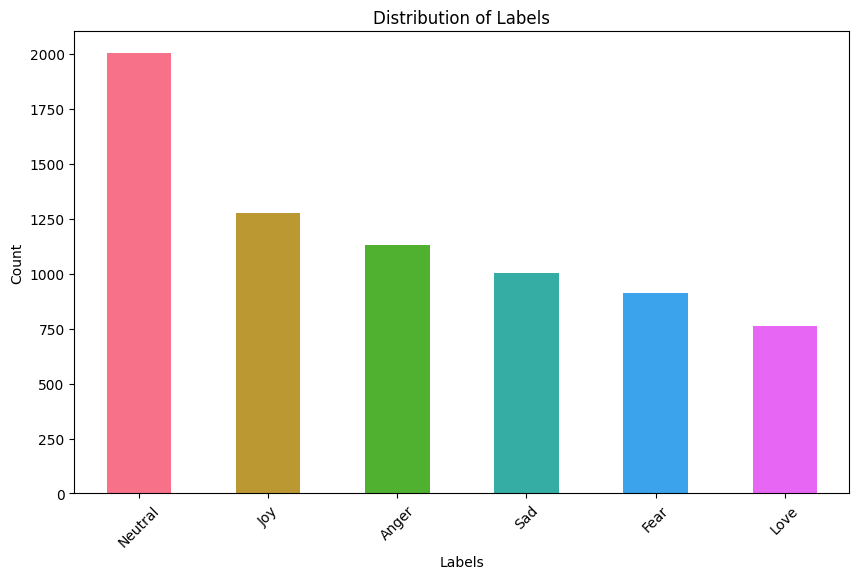

In [54]:
label_counts = eda_data["label"].value_counts()

# Generate a color palette with a unique color for each label
palette = sns.color_palette("husl", len(label_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=palette)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Netral memiliki lebih banyak data dibandingkan label yang lain. 

## Data Distribution

In [55]:
eda_data['Length'] = eda_data['tweet'].str.len()
eda_data.head(10)

,tweet,label,Length
0,pagi2 udah di buat emosi :),Anger,27
1,"kok stabilitas negara, memange 10 thn negara t...",Anger,184
2,dah lah emosi mulu liat emyu,Anger,28
3,"aib? bodoh benar! sebelum kata aib itu muncul,...",Anger,277
4,dih lu yg nyebelin bego,Anger,23
5,"asli malu maluin org indo tolol yg rep latah ""...",Anger,211
6,drama abg tolol,Anger,15
7,masih emosi sih sama katla kemarin. mana keter...,Anger,87
8,"bangsat tribute no.1, bencana no.2 mau ngalahi...",Anger,58
9,pengen pergi jauh terus teriak sambil nangis s...,Anger,136


In [56]:
print(f"Rata-rata panjang karakter tweet : {eda_data['Length'].mean():.2f}")

Rata-rata panjang karakter tweet : 99.51


In [57]:
print(f"Jumlah panjang karakter tweet  : {eda_data['Length'].sum():.2f}")

Jumlah panjang karakter tweet  : 704496.00


In [58]:
def word_count(tweet):
    tweet_list = tweet.split()
    return len(tweet_list)

In [59]:
eda_data['Word_count'] = eda_data['tweet'].apply(word_count)
eda_data.head(10)

,tweet,label,Length,Word_count
0,pagi2 udah di buat emosi :),Anger,27,6
1,"kok stabilitas negara, memange 10 thn negara t...",Anger,184,25
2,dah lah emosi mulu liat emyu,Anger,28,6
3,"aib? bodoh benar! sebelum kata aib itu muncul,...",Anger,277,40
4,dih lu yg nyebelin bego,Anger,23,5
5,"asli malu maluin org indo tolol yg rep latah ""...",Anger,211,37
6,drama abg tolol,Anger,15,3
7,masih emosi sih sama katla kemarin. mana keter...,Anger,87,13
8,"bangsat tribute no.1, bencana no.2 mau ngalahi...",Anger,58,9
9,pengen pergi jauh terus teriak sambil nangis s...,Anger,136,21


In [60]:
print(f"Jumlah kata : {eda_data['Word_count'].sum():.2f}")

Jumlah kata : 118666.00


In [61]:
print(f"Rata-rata jumlah kata : {eda_data['Word_count'].mean():.2f}")

Rata-rata jumlah kata : 16.76


In [62]:
eda_data['mean_word_length'] = eda_data['tweet'].map(lambda rev: numpy.mean([len(word) for word in rev.split()]))
eda_data.head(10)

,tweet,label,Length,Word_count,mean_word_length
0,pagi2 udah di buat emosi :),Anger,27,6,3.666667
1,"kok stabilitas negara, memange 10 thn negara t...",Anger,184,25,6.400000
2,dah lah emosi mulu liat emyu,Anger,28,6,3.833333
3,"aib? bodoh benar! sebelum kata aib itu muncul,...",Anger,277,40,5.950000
4,dih lu yg nyebelin bego,Anger,23,5,3.800000
5,"asli malu maluin org indo tolol yg rep latah ""...",Anger,211,37,4.729730
6,drama abg tolol,Anger,15,3,4.333333
7,masih emosi sih sama katla kemarin. mana keter...,Anger,87,13,5.769231
8,"bangsat tribute no.1, bencana no.2 mau ngalahi...",Anger,58,9,5.555556
9,pengen pergi jauh terus teriak sambil nangis s...,Anger,136,21,5.523810


In [63]:
eda_data['mean_sent_length'] = eda_data['tweet'].map(lambda rev: numpy.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
eda_data.head(10)

,tweet,label,Length,Word_count,mean_word_length,mean_sent_length
0,pagi2 udah di buat emosi :),Anger,27,6,3.666667,27.000000
1,"kok stabilitas negara, memange 10 thn negara t...",Anger,184,25,6.400000,184.000000
2,dah lah emosi mulu liat emyu,Anger,28,6,3.833333,28.000000
3,"aib? bodoh benar! sebelum kata aib itu muncul,...",Anger,277,40,5.950000,29.888889
4,dih lu yg nyebelin bego,Anger,23,5,3.800000,23.000000
5,"asli malu maluin org indo tolol yg rep latah ""...",Anger,211,37,4.729730,211.000000
6,drama abg tolol,Anger,15,3,4.333333,15.000000
7,masih emosi sih sama katla kemarin. mana keter...,Anger,87,13,5.769231,28.333333
8,"bangsat tribute no.1, bencana no.2 mau ngalahi...",Anger,58,9,5.555556,58.000000
9,pengen pergi jauh terus teriak sambil nangis s...,Anger,136,21,5.523810,136.000000


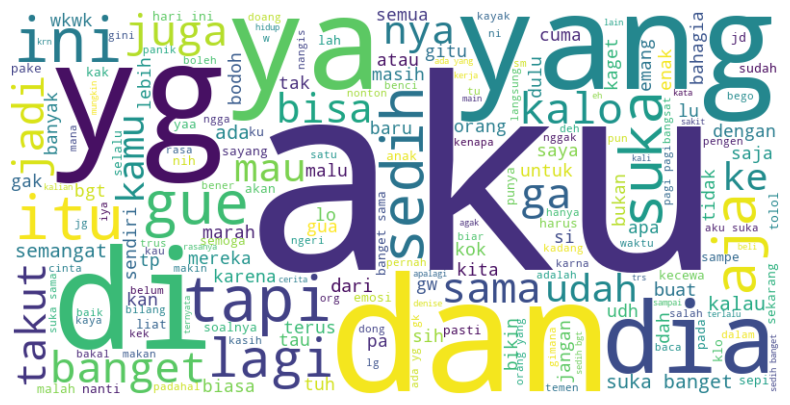

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam satu string
all_tweets = ' '.join(eda_data['tweet'])

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Preprocessing

In [65]:
import copy

train_data_copy = copy.deepcopy(train_data)


## Case Folding

### Lowercase

In [66]:
def tweet_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [67]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_lowercase)

CPU times: total: 0 ns
Wall time: 5.12 ms


In [68]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),pagi2 udah di buat emosi :)
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh.."
2,dah lah emosi mulu liat emyu,dah lah emosi mulu liat emyu
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,dih lu yg nyebelin bego,dih lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [69]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_lowercase)

CPU times: total: 0 ns
Wall time: 2.36 ms


## Cleansing

### Menghapus username

In [70]:
def tweet_delete_username(tweet):
    userPattern       = 'USERNAME'
    # Ngehapus kata "username" 
    tweet = re.sub(userPattern, '', tweet)
    
    return tweet

In [71]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_username)

CPU times: total: 15.6 ms
Wall time: 8.51 ms


In [72]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),pagi2 udah di buat emosi :)
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh.."
2,dah lah emosi mulu liat emyu,dah lah emosi mulu liat emyu
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,dih lu yg nyebelin bego,dih lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [73]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 8 ms


### Menghapus url

In [74]:
def tweet_delete_url(tweet):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*|url)" #Pola ngehapus url
    tweet = re.sub(urlPattern, '', tweet)
    return tweet

In [75]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_url)

CPU times: total: 15.6 ms
Wall time: 51 ms


In [76]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),pagi2 udah di buat emosi :)
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh.."
2,dah lah emosi mulu liat emyu,dah lah emosi mulu liat emyu
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,dih lu yg nyebelin bego,dih lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [77]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_url)

CPU times: total: 31.2 ms
Wall time: 44.7 ms


### Menghapus kelebihan huruf

In [78]:
def tweet_delete_extra_letters(tweet):
    sequencePattern   = r'([A-Za-z])\1{2,}' #Pola ngehapus karakter yang punya kelebihan huruf
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    
    return tweet

In [79]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 15.6 ms
Wall time: 54 ms


In [80]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),pagi2 udah di buat emosi :)
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh.."
2,dah lah emosi mulu liat emyu,dah lah emosi mulu liat emyu
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,dih lu yg nyebelin bego,dih lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [81]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 15.6 ms
Wall time: 74.6 ms


### Menghapus Noise

In [82]:
def tweet_delete_noise(tweet):
        tweet = re.sub(r'(asslamu alaikum|assalamualaikum|asalamualaikum|assalamu\'alaikum|Assalamu alaikum|Assalamualaikum warahmatullahi wabarakatuh|ass wr\. wb\.|ass)', '', tweet)
        tweet = re.sub(r'\b(dah|doi|dih|kok|pol|brow|emyu|skin|anjir|anjay|njir|bjir|jir|njay|anjoy|ajg|min|admin|gan|sis|sih|ke|di|dari|lah|kudu|oalah|lha|yah|yha|amp|n|nih|loo|hadeuh|waduh|sok|na|cing|hadeuh|loh|lho|bro|cui|cuy|yuk|yok|kuy|kan)\b', '', tweet)
        return tweet

In [83]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_noise)

CPU times: total: 31.2 ms
Wall time: 136 ms


In [84]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),pagi2 udah buat emosi :)
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh.."
2,dah lah emosi mulu liat emyu,emosi mulu liat
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,dih lu yg nyebelin bego,lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [85]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_noise)

CPU times: total: 78.1 ms
Wall time: 144 ms


### Menghapus new line dan new text

In [86]:
def tweet_delete_new_line_new_text(tweet):
    tweet = re.sub(r'\\[nt]', ' ', tweet)
    return tweet

In [87]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 14 ms


In [88]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah buat emosi :),pagi2 udah buat emosi :)
1,"stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh..","stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh.."
2,emosi mulu liat,emosi mulu liat
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,lu yg nyebelin bego,lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [89]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 9.28 ms


### Menghapus Hastag

In [90]:
def tweet_remove_hashtags(tweet):
    hashtag= r'#\w+'
    tweet = re.sub(hashtag, '', tweet)
    return tweet

In [91]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_remove_hashtags)

CPU times: total: 0 ns
Wall time: 10.1 ms


In [92]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

pd.options.display.max_colwidth = 150

display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah buat emosi :),pagi2 udah buat emosi :)
1,"stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh..","stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh.."
2,emosi mulu liat,emosi mulu liat
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,lu yg nyebelin bego,lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [93]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_remove_hashtags)

CPU times: total: 0 ns
Wall time: 9.24 ms


### Menghapus angka

In [94]:
def tweet_delete_number(tweet):
    number = r'\d+' 
    tweet = re.sub(number, '', tweet)
    return tweet

In [95]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_number)

CPU times: total: 15.6 ms
Wall time: 32.6 ms


In [96]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah buat emosi :),pagi udah buat emosi :)
1,"stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh..","stabilitas negara, memange thn negara tdk aman, bahkan sby menyuburkan ormas radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh.."
2,emosi mulu liat,emosi mulu liat
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,lu yg nyebelin bego,lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no., bencana no. mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [97]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_number)

CPU times: total: 0 ns
Wall time: 40.1 ms


### Menghapus tanda baca

In [98]:
def tweet_delete_punctuation(tweet):
    punctuationPattern = r'[^\w\s]' 
    tweet = re.sub(punctuationPattern, ' ', tweet)
    
    return tweet

In [99]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_punctuation)

CPU times: total: 0 ns
Wall time: 44.7 ms


In [100]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi udah buat emosi :),pagi udah buat emosi
1,"stabilitas negara, memange thn negara tdk aman, bahkan sby menyuburkan ormas radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh..",stabilitas negara memange thn negara tdk aman bahkan sby menyuburkan ormas radikal intoleran teroris yg berafiliasi partai tertentu narasi klhtn intelektual tp bodoh
2,emosi mulu liat,emosi mulu liat
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya",aib bodoh benar sebelum kata aib itu muncul terlebih dahulu sudah ada tindakan yakni kekejian jangan kau sembunyikan caramu menelaah masalah semisal anak perempuanmu ditempeleng apa kau juga setuju untuk dia bersikap bungkam melapor polisi adl benar lantas apa bedanya
4,lu yg nyebelin bego,lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol",asli malu maluin org indo tolol yg rep latah cilukba pake huruf hijaiyah sm ngntd sama ganti huruf t pake salib ada tiktok filipin lewat fyp aku dan repnya ngtd semua dasar goblogg trend tiktok ter tolol
6,drama abg tolol,drama abg tolol
7,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sama katla kemarin mana keterangannya gini aja hasil mengaci kzl
8,"bangsat tribute no., bencana no. mau ngalahin ini keknya",bangsat tribute no bencana no mau ngalahin ini keknya
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [101]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_punctuation)

CPU times: total: 0 ns
Wall time: 33.4 ms


### Menghapus Extra Spasi

In [102]:
def tweet_delete_extra_space(tweet):
    tweet = re.sub(r"\s+", " ", tweet)
    tweet = re.sub(r"^\s+|\s+$", "", tweet)
    
    return tweet

In [103]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_extra_space)

CPU times: total: 93.8 ms
Wall time: 155 ms


In [104]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi udah buat emosi,pagi udah buat emosi
1,stabilitas negara memange thn negara tdk aman bahkan sby menyuburkan ormas radikal intoleran teroris yg berafiliasi partai tertentu narasi klhtn intelektual tp bodoh,stabilitas negara memange thn negara tdk aman bahkan sby menyuburkan ormas radikal intoleran teroris yg berafiliasi partai tertentu narasi klhtn intelektual tp bodoh
2,emosi mulu liat,emosi mulu liat
3,aib bodoh benar sebelum kata aib itu muncul terlebih dahulu sudah ada tindakan yakni kekejian jangan kau sembunyikan caramu menelaah masalah semisal anak perempuanmu ditempeleng apa kau juga setuju untuk dia bersikap bungkam melapor polisi adl benar lantas apa bedanya,aib bodoh benar sebelum kata aib itu muncul terlebih dahulu sudah ada tindakan yakni kekejian jangan kau sembunyikan caramu menelaah masalah semisal anak perempuanmu ditempeleng apa kau juga setuju untuk dia bersikap bungkam melapor polisi adl benar lantas apa bedanya
4,lu yg nyebelin bego,lu yg nyebelin bego
5,asli malu maluin org indo tolol yg rep latah cilukba pake huruf hijaiyah sm ngntd sama ganti huruf t pake salib ada tiktok filipin lewat fyp aku dan repnya ngtd semua dasar goblogg trend tiktok ter tolol,asli malu maluin org indo tolol yg rep latah cilukba pake huruf hijaiyah sm ngntd sama ganti huruf t pake salib ada tiktok filipin lewat fyp aku dan repnya ngtd semua dasar goblogg trend tiktok ter tolol
6,drama abg tolol,drama abg tolol
7,masih emosi sama katla kemarin mana keterangannya gini aja hasil mengaci kzl,masih emosi sama katla kemarin mana keterangannya gini aja hasil mengaci kzl
8,bangsat tribute no bencana no mau ngalahin ini keknya,bangsat tribute no bencana no mau ngalahin ini keknya
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [105]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_extra_space)

CPU times: total: 46.9 ms
Wall time: 131 ms


## Tokenization

In [106]:
from nltk.tokenize import word_tokenize 

In [107]:
def tweet_tokenize(tweet):
    return word_tokenize(tweet)

In [108]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_tokenize)

CPU times: total: 562 ms
Wall time: 1.22 s


In [109]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi udah buat emosi,"[pagi, udah, buat, emosi]"
1,stabilitas negara memange thn negara tdk aman bahkan sby menyuburkan ormas radikal intoleran teroris yg berafiliasi partai tertentu narasi klhtn intelektual tp bodoh,"[stabilitas, negara, memange, thn, negara, tdk, aman, bahkan, sby, menyuburkan, ormas, radikal, intoleran, teroris, yg, berafiliasi, partai, tertentu, narasi, klhtn, intelektual, tp, bodoh]"
2,emosi mulu liat,"[emosi, mulu, liat]"
3,aib bodoh benar sebelum kata aib itu muncul terlebih dahulu sudah ada tindakan yakni kekejian jangan kau sembunyikan caramu menelaah masalah semisal anak perempuanmu ditempeleng apa kau juga setuju untuk dia bersikap bungkam melapor polisi adl benar lantas apa bedanya,"[aib, bodoh, benar, sebelum, kata, aib, itu, muncul, terlebih, dahulu, sudah, ada, tindakan, yakni, kekejian, jangan, kau, sembunyikan, caramu, menelaah, masalah, semisal, anak, perempuanmu, ditempeleng, apa, kau, juga, setuju, untuk, dia, bersikap, bungkam, melapor, polisi, adl, benar, lantas, apa, bedanya]"
4,lu yg nyebelin bego,"[lu, yg, nyebelin, bego]"
5,asli malu maluin org indo tolol yg rep latah cilukba pake huruf hijaiyah sm ngntd sama ganti huruf t pake salib ada tiktok filipin lewat fyp aku dan repnya ngtd semua dasar goblogg trend tiktok ter tolol,"[asli, malu, maluin, org, indo, tolol, yg, rep, latah, cilukba, pake, huruf, hijaiyah, sm, ngntd, sama, ganti, huruf, t, pake, salib, ada, tiktok, filipin, lewat, fyp, aku, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]"
6,drama abg tolol,"[drama, abg, tolol]"
7,masih emosi sama katla kemarin mana keterangannya gini aja hasil mengaci kzl,"[masih, emosi, sama, katla, kemarin, mana, keterangannya, gini, aja, hasil, mengaci, kzl]"
8,bangsat tribute no bencana no mau ngalahin ini keknya,"[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, keknya]"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,"[pengen, pergi, jauh, terus, teriak, sambil, nangis, sekencang, kencangnya, nanti, balik, kalo, gue, udah, lupa, segalanya, wkwj, kn, tolol, mustahil, banget]"


In [110]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_tokenize)

CPU times: total: 891 ms
Wall time: 1.5 s


## Normalization

### Import Kamus

In [111]:
kamus_singkatan = pd.read_csv("./Dataset/kamus_singkatan.csv",names=["kata_gaul","kata_asal"],delimiter=";")
kamus_singkatan

,kata_gaul,kata_asal
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim
...,...,...
1304,yoi,iya
1305,yup,ya
1306,yups,ya
1307,yupz,ya


In [112]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["kata_gaul"][i]]=kamus_singkatan["kata_asal"][i].lower().strip()
      return kamus

In [113]:
kamus = create_kamus()
kamus

{'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'beberapa',
 'bc': 'baca'

In [114]:
def tweet_replace_contractions(tweet):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    tweet = pattern.sub(lambda x: kamus[x.group()], tweet)
    return tweet

In [115]:
%%time
for i in range(0,len(train_data)):
    himpunan_kata=[]
    for tokenize_tweet in train_data["tweet"][i]:
        tokenize_tweet = tweet_replace_contractions(tokenize_tweet)
        himpunan_kata.append(tokenize_tweet)
    train_data["tweet"][i]=himpunan_kata
    i+1

CPU times: total: 1min 11s
Wall time: 1min 22s


In [116]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[pagi, udah, buat, emosi]","[pagi, sudah, buat, emosi]"
1,"[stabilitas, negara, memange, thn, negara, tdk, aman, bahkan, sby, menyuburkan, ormas, radikal, intoleran, teroris, yg, berafiliasi, partai, tertentu, narasi, klhtn, intelektual, tp, bodoh]","[stabilitas, negara, memange, tahun, negara, tidak, aman, bahkan, sby, menyuburkan, ormas, radikal, intoleran, teroris, yang, berafiliasi, partai, tertentu, narasi, klhtn, intelektual, tapi, bodoh]"
2,"[emosi, mulu, liat]","[emosi, terus, liat]"
3,"[aib, bodoh, benar, sebelum, kata, aib, itu, muncul, terlebih, dahulu, sudah, ada, tindakan, yakni, kekejian, jangan, kau, sembunyikan, caramu, menelaah, masalah, semisal, anak, perempuanmu, ditempeleng, apa, kau, juga, setuju, untuk, dia, bersikap, bungkam, melapor, polisi, adl, benar, lantas, apa, bedanya]","[aib, bodoh, benar, sebelum, kata, aib, itu, muncul, terlebih, dahulu, sudah, ada, tindakan, yakni, kekejian, jangan, kamu, sembunyikan, caramu, menelaah, masalah, semisal, anak, perempuanmu, ditempeleng, apa, kamu, juga, setuju, untuk, dia, bersikap, bungkam, melapor, polisi, adl, benar, lantas, apa, bedanya]"
4,"[lu, yg, nyebelin, bego]","[kamu, yang, menyebalkan, bodoh]"
5,"[asli, malu, maluin, org, indo, tolol, yg, rep, latah, cilukba, pake, huruf, hijaiyah, sm, ngntd, sama, ganti, huruf, t, pake, salib, ada, tiktok, filipin, lewat, fyp, aku, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]","[asli, malu, maluin, orang, indo, tolol, yang, rep, latah, cilukba, pakai, huruf, hijaiyah, sama, ngntd, sama, ganti, huruf, t, pakai, salib, ada, tiktok, filipin, lewat, fyp, saya, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]"
6,"[drama, abg, tolol]","[drama, abg, tolol]"
7,"[masih, emosi, sama, katla, kemarin, mana, keterangannya, gini, aja, hasil, mengaci, kzl]","[masih, emosi, sama, katla, kemarin, mana, keterangannya, gini, saja, hasil, mengaci, kesal]"
8,"[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, keknya]","[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, sepertinya]"
9,"[pengen, pergi, jauh, terus, teriak, sambil, nangis, sekencang, kencangnya, nanti, balik, kalo, gue, udah, lupa, segalanya, wkwj, kn, tolol, mustahil, banget]","[ingin, pergi, jauh, terus, teriak, sambil, nangis, sekencang, kencangnya, nanti, balik, kalau, saya, sudah, lupa, segalanya, wkwj, kan, tolol, mustahil, sekali]"


In [117]:
%%time
for i in range(0,len(train_data_copy)):
    himpunan_kata=[]
    for tokenize_tweet in train_data_copy["tweet"][i]:
        tokenize_tweet = tweet_replace_contractions(tokenize_tweet)
        himpunan_kata.append(tokenize_tweet)
    train_data_copy["tweet"][i]=himpunan_kata
    i+1

CPU times: total: 1min 13s
Wall time: 1min 21s


### Stopwords Removal

In [118]:
def tweet_stopwords_removal(tweet):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    tweet = stopword.remove(tweet)
    return tweet

In [119]:
%%time
for i in range(0,len(train_data)):
    himpunan_kata=[]
    for tokenize_tweet in train_data["tweet"][i]:
        tokenize_tweet = tweet_stopwords_removal(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    train_data["tweet"][i]=himpunan_kata
    i+1

CPU times: total: 6.61 s
Wall time: 7.33 s


In [120]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[pagi, sudah, buat, emosi]","[pagi, emosi]"
1,"[stabilitas, negara, memange, tahun, negara, tidak, aman, bahkan, sby, menyuburkan, ormas, radikal, intoleran, teroris, yang, berafiliasi, partai, tertentu, narasi, klhtn, intelektual, tapi, bodoh]","[stabilitas, negara, memange, tahun, negara, aman, sby, menyuburkan, ormas, radikal, intoleran, teroris, berafiliasi, partai, narasi, klhtn, intelektual, bodoh]"
2,"[emosi, terus, liat]","[emosi, liat]"
3,"[aib, bodoh, benar, sebelum, kata, aib, itu, muncul, terlebih, dahulu, sudah, ada, tindakan, yakni, kekejian, jangan, kamu, sembunyikan, caramu, menelaah, masalah, semisal, anak, perempuanmu, ditempeleng, apa, kamu, juga, setuju, untuk, dia, bersikap, bungkam, melapor, polisi, adl, benar, lantas, apa, bedanya]","[aib, bodoh, aib, muncul, tindakan, kekejian, sembunyikan, caramu, menelaah, anak, perempuanmu, ditempeleng, setuju, bersikap, bungkam, melapor, polisi, adl, lantas, bedanya]"
4,"[kamu, yang, menyebalkan, bodoh]","[menyebalkan, bodoh]"
5,"[asli, malu, maluin, orang, indo, tolol, yang, rep, latah, cilukba, pakai, huruf, hijaiyah, sama, ngntd, sama, ganti, huruf, t, pakai, salib, ada, tiktok, filipin, lewat, fyp, saya, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]","[asli, malu, maluin, indo, tolol, rep, latah, cilukba, pakai, huruf, hijaiyah, ngntd, ganti, huruf, pakai, salib, tiktok, filipin, fyp, repnya, ngtd, dasar, goblogg, trend, tiktok, ter, tolol]"
6,"[drama, abg, tolol]","[drama, abg, tolol]"
7,"[masih, emosi, sama, katla, kemarin, mana, keterangannya, gini, saja, hasil, mengaci, kesal]","[emosi, katla, kemarin, keterangannya, gini, hasil, mengaci, kesal]"
8,"[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, sepertinya]","[bangsat, tribute, no, bencana, no, ngalahin]"
9,"[ingin, pergi, jauh, terus, teriak, sambil, nangis, sekencang, kencangnya, nanti, balik, kalau, saya, sudah, lupa, segalanya, wkwj, kan, tolol, mustahil, sekali]","[pergi, teriak, nangis, sekencang, kencangnya, lupa, wkwj, tolol, mustahil]"


In [121]:
%%time
for i in range(0,len(train_data_copy)):
    himpunan_kata=[]
    for tokenize_tweet in train_data_copy["tweet"][i]:
        tokenize_tweet = tweet_stopwords_removal(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    train_data_copy["tweet"][i]=himpunan_kata
    i+1

CPU times: total: 6.62 s
Wall time: 7.98 s


## Saving Preposessing

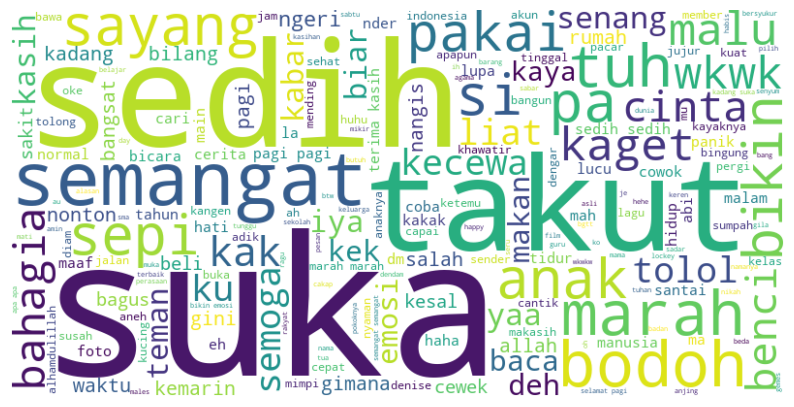

In [122]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called train_data with a column "tweet"
# containing the tweets

# Convert lists of tweets into a single string
all_tweets = ' '.join([tweet for sublist in train_data['tweet'] for tweet in sublist])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [123]:
comparison_df = pd.DataFrame({
    'Before ': eda_data['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),"[pagi, emosi]"
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","[stabilitas, negara, memange, tahun, negara, aman, sby, menyuburkan, ormas, radikal, intoleran, teroris, berafiliasi, partai, narasi, klhtn, intelektual, bodoh]"
2,dah lah emosi mulu liat emyu,"[emosi, liat]"
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","[aib, bodoh, aib, muncul, tindakan, kekejian, sembunyikan, caramu, menelaah, anak, perempuanmu, ditempeleng, setuju, bersikap, bungkam, melapor, polisi, adl, lantas, bedanya]"
4,dih lu yg nyebelin bego,"[menyebalkan, bodoh]"
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","[asli, malu, maluin, indo, tolol, rep, latah, cilukba, pakai, huruf, hijaiyah, ngntd, ganti, huruf, pakai, salib, tiktok, filipin, fyp, repnya, ngtd, dasar, goblogg, trend, tiktok, ter, tolol]"
6,drama abg tolol,"[drama, abg, tolol]"
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,"[emosi, katla, kemarin, keterangannya, gini, hasil, mengaci, kesal]"
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","[bangsat, tribute, no, bencana, no, ngalahin]"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,"[pergi, teriak, nangis, sekencang, kencangnya, lupa, wkwj, tolol, mustahil]"


In [124]:
train_data.to_csv("Dataset/Training/Clean_train_data_nostem.csv")